# Activity 3 (Wednesday)

As a reminder the objective of this study is to predict the total claim amount of a customer and study/investigate the impact of the factors (input features) on the target variable(total claim amount). That means in your exploratory data analysis, you have to look for patterns in this data that show interesting relationships among the input features as well as with relation to the target feature.

- Get the numeric data into a dataframe called numerical and categorical columns in a dataframe called categorical. (You can use "np.number" and "object" to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
      
      - Use the Seaborn library to construct distribution plots for the numerical variables
      - Use the Matplotlib library to construct histograms.
      - Do the distributions for different numerical variables look like a normal distribution?
- For the numerical variables, check for correlation between the input features. Note: this does not include the target feature.
- Plot the Correlation Heatmap.
- (Optional): Drop one of the two features that show a high correlation between them (greater than 0.9). If there is no pair of features that have a high correlation, then do not drop any features.

In [1]:
# import libraries to use (pandas, matplotlib.pyplot and seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/repicao/IH_AB_DA_FT_MAY_2023/master/Class_Materials/Case_Studies/Customer_Analysis_Case_Study/Data/Data_Marketing_Customer_Analysis_Round3.csv')
df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [4]:
numerical = df.select_dtypes(include=[np.number])

# Select the categorical columns
categorical = df.select_dtypes(include=[object])

numerical



,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [11]:
categorical

,Customer,State,Education,Gender,Policy Type,Vehicle Class
0,SA25987,Washington,High School or Below,M,Personal Auto,Two-Door Car
1,TB86706,Arizona,Master,M,Personal Auto,Two-Door Car
2,ZL73902,Nevada,Bachelor,F,Personal Auto,Four-Door Car
3,KX23516,California,High School or Below,F,Personal Auto,SUV
4,FN77294,California,High School or Below,M,Personal Auto,SUV
...,...,...,...,...,...,...
7065,LA72316,California,Bachelor,M,Personal Auto,Four-Door Car
7066,PK87824,California,College,F,Corporate Auto,Four-Door Car
7067,TD14365,California,Bachelor,M,Corporate Auto,Four-Door Car
7068,UP19263,California,College,M,Personal Auto,Four-Door Car


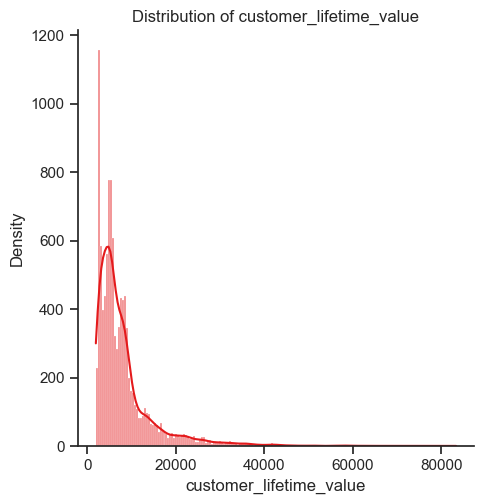

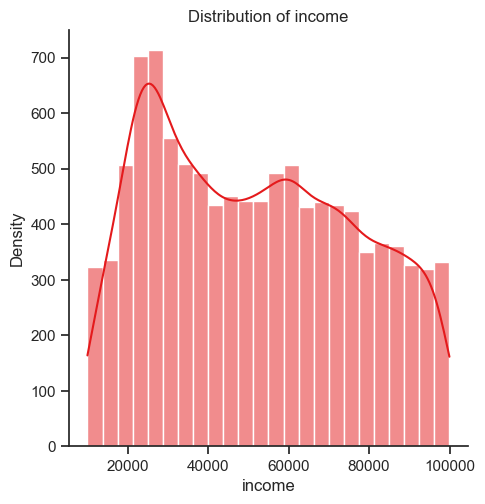

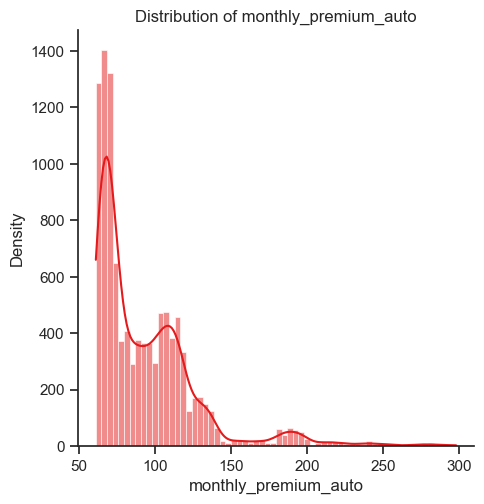

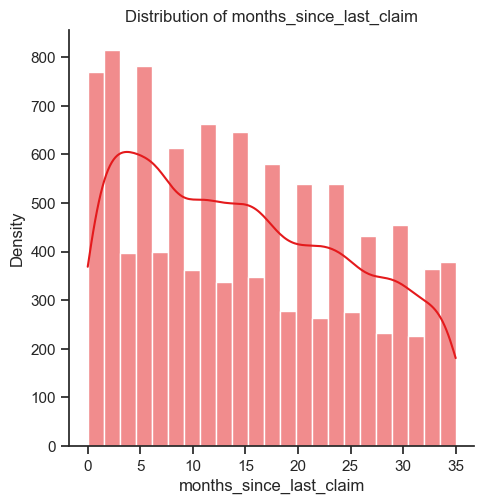

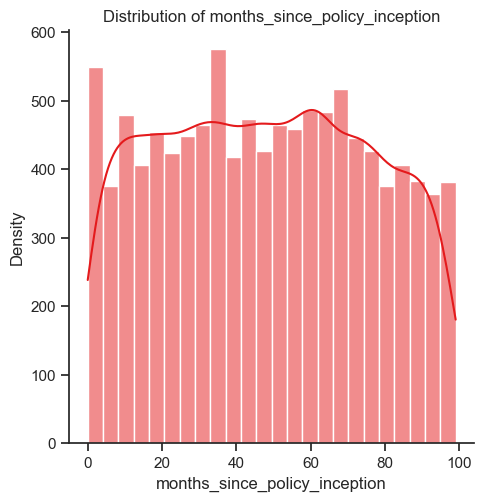

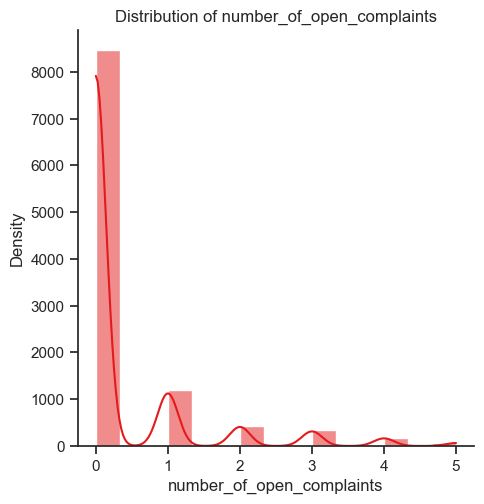

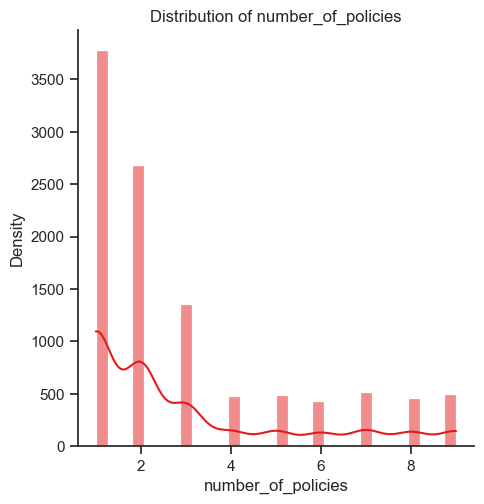

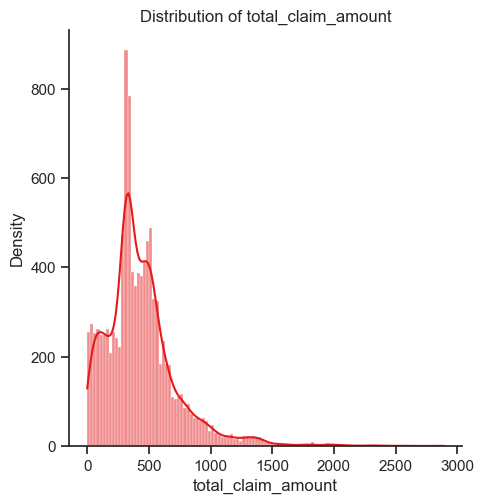

In [5]:
sns.set(style="ticks")
sns.set_palette("Set1")

for column in numerical.columns:
    sns.displot(numerical[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.show()

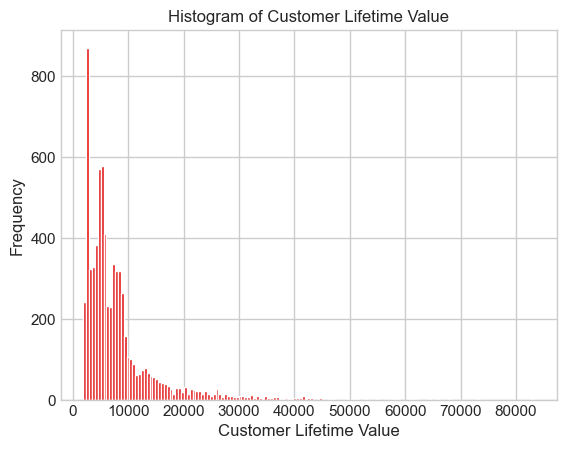

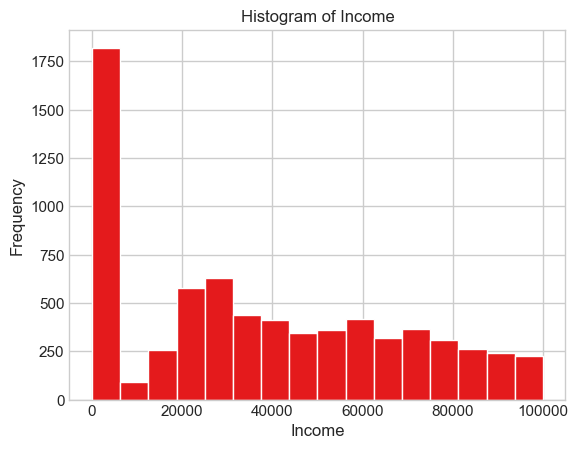

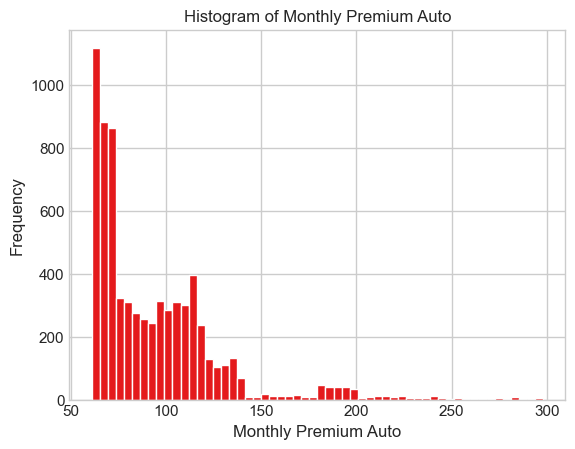

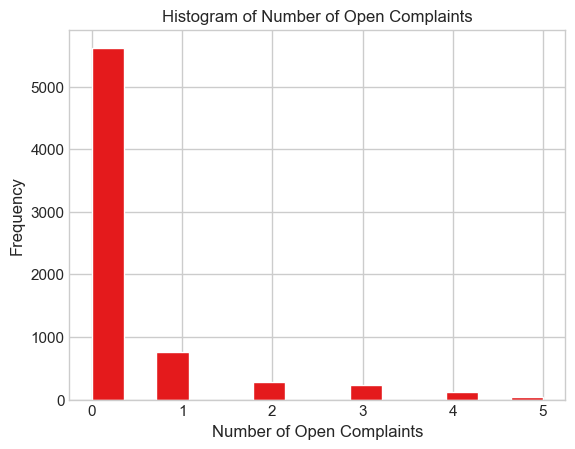

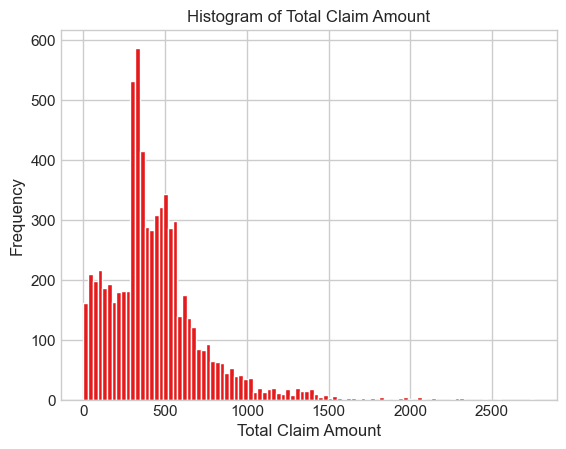

In [25]:
# Plot histograms using matplotlib
#plt.style.use('seaborn-whitegrid')

for column in numerical.columns:
    plt.hist(numerical[column], bins='auto')
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

<Axes: >

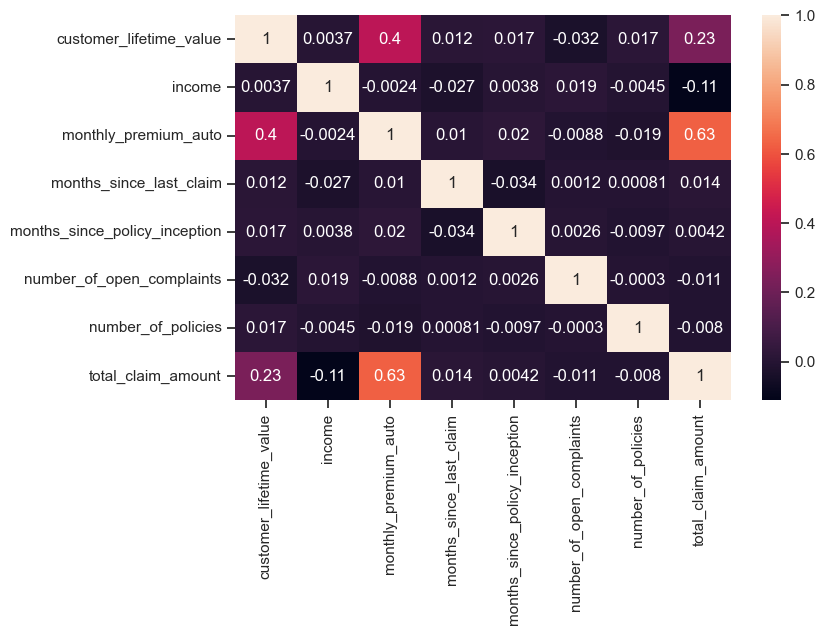

In [6]:
fig=plt.figure(figsize=(8,5))
sns.heatmap(numerical.corr(),annot=True)